<a href="https://colab.research.google.com/github/SujitbMusale/Airbnb-EDA/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
# we discused about project

Step-1: import important libraries  pandas, matplotlib 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Step-2:mount drive on google colab

In [3]:
from google.colab import drive  
drive.mount('/content/drive')

Mounted at /content/drive


Step-3 : Read given csv file for airbnb project from drive

In [4]:
airbnb_df = pd.read_csv('/content/drive/MyDrive/almabetter/Airbnb NYC 2019.csv')

Step-4: observe some details like what are the heading are there, what is size of data and type of data that has being given

In [5]:
airbnb_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
airbnb_df.shape

(48895, 16)

In [7]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Step-5: Here "host_name","last_review","reviews_per_month" are having some null values,so lets drop that null values from the data

In [9]:
airbnb = airbnb_df.fillna(0)

In [10]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Here we nan note that the minmum reviev are zero nut it possibe so no need to replace and also we are have min avilability of zero that is our intrest to find out the bussiest host amoung all host.

Step-6: lets check the room type avilabel in the given data and will check the count of same and if any room type containing less bookings we will drop it out.

In [11]:
airbnb['room_type'].value_counts(ascending = False)

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64



*   some obs are 3 types of rooms avialbe among them shared room are very less as compaired to entire home/apt and privet room
*   so we droped the shared room type from data set



# Question-1
**What can we learn about different hosts and areas?**



Step-7: we will find out the total number of host present and also find out first 20 potensial host.

In [12]:
unique_host = airbnb['host_name'].nunique()
unique_host

11453

In [13]:
host_count = airbnb['host_name'].value_counts()
frequently_hosting_host =host_count[host_count>10]
unique_frequently_hosting_host =frequently_hosting_host.nunique()

In [14]:
unique_frequently_hosting_host_percentage = round((unique_frequently_hosting_host/unique_host)*100)
unique_frequently_hosting_host_percentage

1

Step-8:
we are finding the area from given data which are having higher number 
of booking.



In [15]:
unique_area = airbnb['neighbourhood_group'].value_counts()
unique_area

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

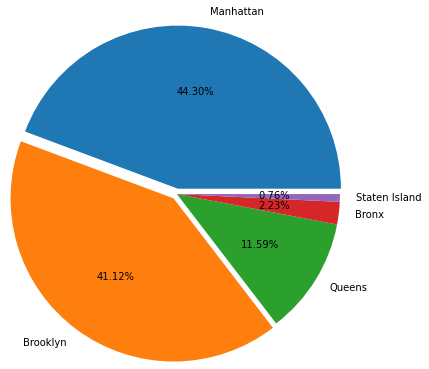

In [16]:
plt.figure(figsize=(20,5))
plt.pie(unique_area,labels=unique_area.keys(),radius=1.5,autopct='%0.2f%%',explode=[0.05,0.05,0,0,0])
plt.show()

From this bar plot can say that the maximum nuber of hosts and rooms present in Manhattan and Brooklyn as compaired to Queens ,Bronx And Staten Island so if any one has to open any service have to open in Queens,Bronx and Staten Island have a less compitations.

In [17]:
neighbourhood_count_appartment_id = airbnb.groupby(['neighbourhood'])['id'].count()[0:5]
neighbourhood_count_appartment_id.sort_values(ascending = False)

neighbourhood
Astoria          900
Arverne           77
Allerton          42
Arrochar          21
Arden Heights      4
Name: id, dtype: int64

we are ploting top 20 neighbourhood where having large number airbnb booking

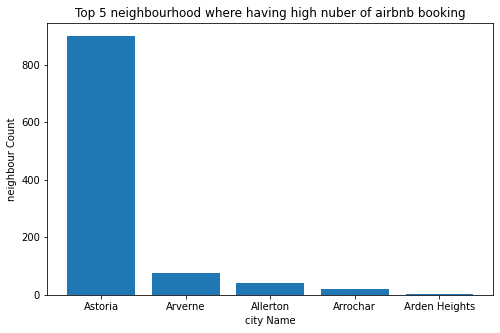

In [18]:
plt.figure(figsize=(8,5))
plt.bar(neighbourhood_count_appartment_id.sort_values(ascending = False).keys(),neighbourhood_count_appartment_id.sort_values(ascending = False))
plt.title('Top 5 neighbourhood where having high nuber of airbnb booking')
plt.xlabel("city Name")
plt.ylabel('neighbour Count')
plt.show()

# Question-2
**What can we learn from predictions? (ex: locations, prices, reviews, etc)**

Step - Here we are tring to find out the mean prise for the different location and doing ploting for same.

In [19]:
area_group = airbnb.groupby(['neighbourhood_group'])

In [20]:
area_group.mean()['price'].sort_values(ascending = False)

neighbourhood_group
Manhattan        196.875814
Brooklyn         124.383207
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64

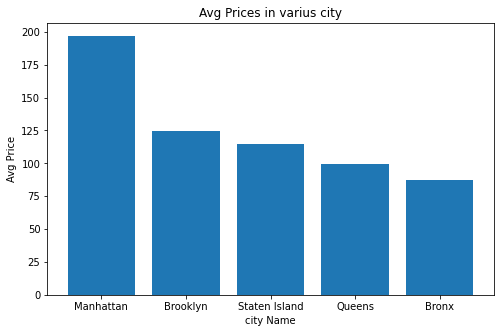

In [21]:
plt.figure(figsize=(8,5))
plt.bar(area_group.mean()['price'].sort_values(ascending = False).keys(),area_group.mean()['price'].sort_values(ascending = False))
plt.title('Avg Prices in varius city')
plt.xlabel("city Name")
plt.ylabel('Avg Price')
plt.show()

In [22]:
room_type_group =airbnb.groupby(['room_type'])

In [23]:
room_type_group.mean()['price']

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

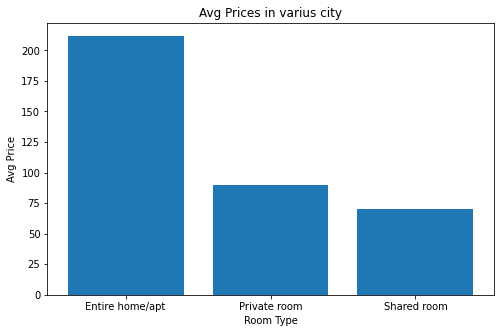

In [24]:
plt.figure(figsize=(8,5))
plt.bar(room_type_group.mean()['price'].keys(),room_type_group.mean()['price'])
plt.title('Avg Prices in varius city')
plt.xlabel("Room Type")
plt.ylabel('Avg Price')
plt.show()

We will chec the commulative revive count to check how the property is having issue or it is a popular generaly people dont say good for good but they are always ready to say somthing about bad so if the count is high we cn say that the property is having issue in service.

In [37]:
review_counts = airbnb.groupby(['number_of_reviews'])['id'].count()
review_counts.sort_values(ascending= False)[0:11]



number_of_reviews
0     10052
1      5244
2      3465
3      2520
4      1994
5      1618
6      1357
7      1179
8      1127
9       964
10      803
Name: id, dtype: int64

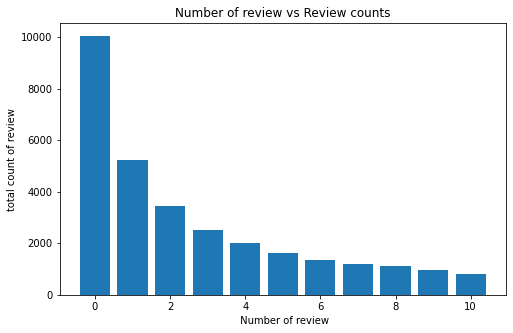

In [39]:
plt.figure(figsize=(8,5))
plt.bar(review_counts.sort_values(ascending= False)[0:11].keys(),review_counts.sort_values(ascending= False)[0:11])
plt.title('Number of review vs Review counts')
plt.xlabel(" Number of review")
plt.ylabel('total count of review')
plt.show()

We will extend this analysis to check whether price, type of room are having any relation with less number of reviwes.

In [60]:
room_type_review_counts = airbnb.groupby(['price'])['number_of_reviews'].sum()
room_type_review_counts.sort_values(ascending= False)[0:6]

price
100    40293
150    36196
60     32096
65     30292
75     29590
50     29069
Name: number_of_reviews, dtype: int64

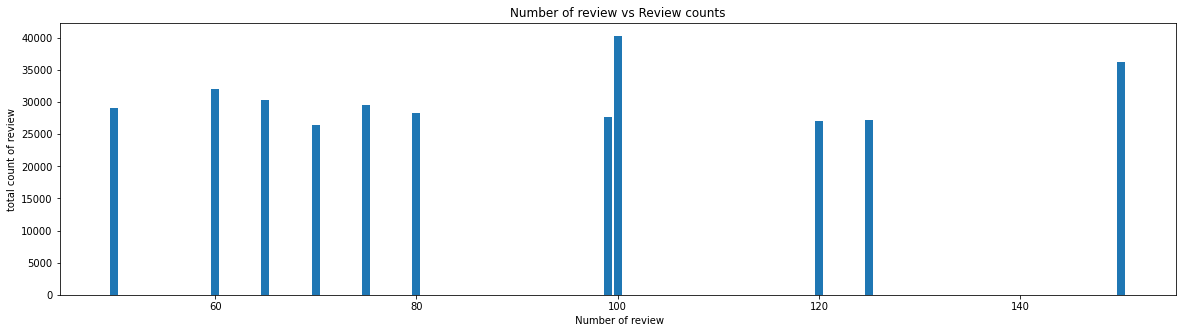

In [61]:
plt.figure(figsize=(20,5))
plt.bar(room_type_review_counts.sort_values(ascending= False)[0:11].keys(),room_type_review_counts.sort_values(ascending= False)[0:11])
plt.title('Number of review vs Review counts')
plt.xlabel(" Number of review")
plt.ylabel('total count of review')
plt.show()

Here we can observe that reviews at 100 and 150 pounds having maximum number of reviews so we can say that this price is having some issue.

In [73]:
room_type_review_counts = airbnb.groupby(['room_type'])['number_of_reviews'].sum()
room_type_review_counts

room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

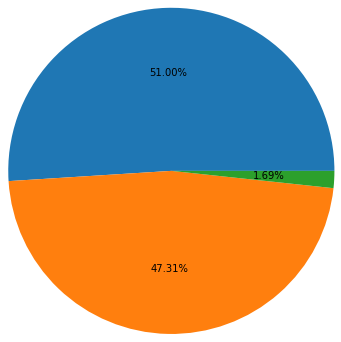

In [77]:
plt.figure(figsize=(20,5))
plt.pie(room_type_review_counts,radius=1.5,autopct='%0.2f%%')
plt.show()

We can observe from above pie chart there is no any issue with room type though shared room type is having less value we all know that the count of this room type is very low as compaired to Entire home/app and privet room.

We want to check with location is any particlar location is having more review as compair to other location

In [80]:
location_review_counts = airbnb.groupby(['neighbourhood_group'])['number_of_reviews'].sum()
location_review_counts

neighbourhood_group
Bronx             28371
Brooklyn         486574
Manhattan        454569
Queens           156950
Staten Island     11541
Name: number_of_reviews, dtype: int64

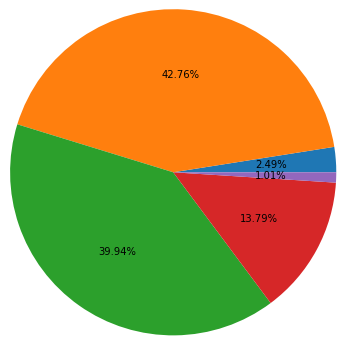

In [81]:
plt.figure(figsize=(20,5))
plt.pie(location_review_counts,radius=1.5,autopct='%0.2f%%')
plt.show()

So here also no any noticeable variation in total review by location point of view as  Manhattan & Brooklyn  having high nuber of service or booking there respective review are aslo high.